In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('diabetes1.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,NaN,1.0


In [34]:
df.dropna()
df = df[np.isfinite(df).all(1)]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21.0,0.0
6,3.0,78,50.0,32.0,88.0,31.0,0.248,26.0,1.0


In [35]:
x = df.iloc[:, 1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(y_pred)

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0.]


In [37]:
from sklearn import metrics 
print("accuracy : ", metrics.accuracy_score(y_test, y_pred))
print("precision : ", metrics.precision_score(y_test, y_pred, average = 'weighted'))
print("recall : ", metrics.recall_score(y_test, y_pred, average = 'weighted'))
print("F1 : ", metrics.f1_score(y_test, y_pred, average = 'weighted'))
print("mcc : ", metrics.matthews_corrcoef(y_test, y_pred))

accuracy :  0.7315436241610739
precision :  0.7198445006784758
recall :  0.7315436241610739
F1 :  0.7059899885756472
mcc :  0.3382669902723721


              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       100
         1.0       0.67      0.37      0.47        49

    accuracy                           0.73       149
   macro avg       0.71      0.64      0.65       149
weighted avg       0.72      0.73      0.71       149



<AxesSubplot:>

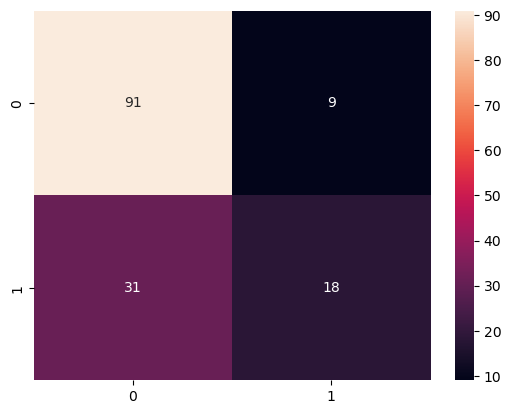

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

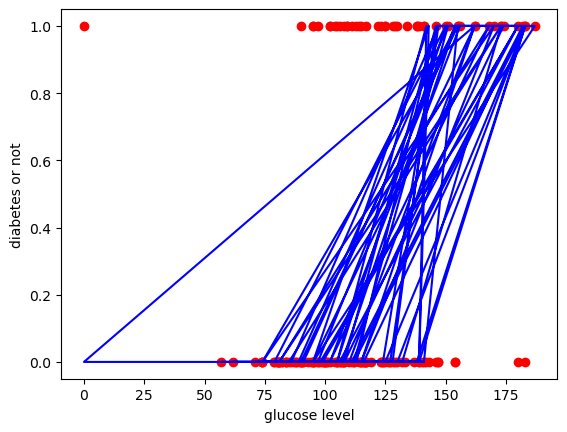

In [39]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, lr.predict(x_test), color = 'blue')
plt.xlabel('glucose level')
plt.ylabel('diabetes or not')
plt.show()